<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Functions-definition" data-toc-modified-id="Functions-definition-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Functions definition</a></span></li><li><span><a href="#Plots" data-toc-modified-id="Plots-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Plots</a></span></li><li><span><a data-toc-modified-id="examples-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Examples</a></span></li><li><span><a href="#Prototyping" data-toc-modified-id="Prototyping-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Prototyping</a></span></li><li><span><a data-toc-modified-id="examples-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Examples</a></span></li><li><span><a data-toc-modified-id="examples-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Examples</a></span></li><li><span><a data-toc-modified-id="examples-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Examples</a></span></li></ul></div>

In [179]:
using Distributions
using PyPlot
using Plots
using Random
using Statistics

# Functions definition

https://docs.julialang.org/en/v1/manual/functions/#man-vectorized

In [154]:
function f(x;debug::Bool=false)
    result =1+ sqrt.(x + 1.0/pi^2)*sin.(1/(x + 1.0/pi^2))

    if debug
        print(x," → ",result,"\t")
    end
    result
end

f (generic function with 1 method)

In [155]:
f(0.12)

0.5383835314029493

In [156]:
f(0.12,debug=true)

0.12 → 0.5383835314029493	

0.5383835314029493

In [157]:
f.([0.12,0.12])

2-element Array{Float64,1}:
 0.5383835314029493
 0.5383835314029493

In [159]:
f.([0.12,0.12],debug=true)

0.12 → 0.5383835314029493	0.12 → 0.5383835314029493	

2-element Array{Float64,1}:
 0.5383835314029493
 0.5383835314029493

https://docs.julialang.org/en/v1/manual/functions/#Function-composition-and-piping

In [161]:
f(f(12))

1.7771696183002912

In [162]:
(f ∘ f)(12)

1.7771696183002912

In [163]:
12 |> f |> f

1.7771696183002912

# Plots

In [8]:
?range

search: range LinRange UnitRange StepRange StepRangeLen StudentizedRange



```
range(start[, stop]; length, stop, step=1)
```

Given a starting value, construct a range either by length or from `start` to `stop`, optionally with a given step (defaults to 1, a [`UnitRange`](@ref)). One of `length` or `stop` is required.  If `length`, `stop`, and `step` are all specified, they must agree.

If `length` and `stop` are provided and `step` is not, the step size will be computed automatically such that there are `length` linearly spaced elements in the range.

If `step` and `stop` are provided and `length` is not, the overall range length will be computed automatically such that the elements are `step` spaced.

Special care is taken to ensure intermediate values are computed rationally. To avoid this induced overhead, see the [`LinRange`](@ref) constructor.

`stop` may be specified as either a positional or keyword argument.

!!! compat "Julia 1.1"
    `stop` as a positional argument requires at least Julia 1.1.


# Examples

```jldoctest
julia> range(1, length=100)
1:100

julia> range(1, stop=100)
1:100

julia> range(1, step=5, length=100)
1:5:496

julia> range(1, step=5, stop=100)
1:5:96

julia> range(1, 10, length=101)
1.0:0.09:10.0

julia> range(1, 100, step=5)
1:5:96
```

---

```
range(start::T; stop::T, length=100) where T<:Colorant
range(start::T, stop::T; length=100) where T<:Colorant
```

Generates N (=`length`) >2 colors in a linearly interpolated ramp from `start` to`stop`, inclusive, returning an `Array` of colors.

!!! compat "Julia 1.1"
    `stop` as a positional argument requires at least Julia 1.1.



Write `\phi` and then press `Tab`. Or even just start `\ph` and press tab once to complete, the second time to make the glyph. 

In [169]:
ϕ = range(0.01,1,length=10000); y = f.(ϕ);

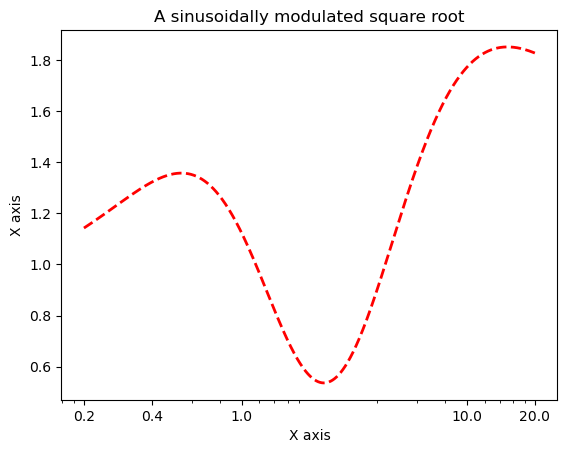

(PyCall.PyObject[PyObject <matplotlib.axis.XTick object at 0x7f9841f1ba60>, PyObject <matplotlib.axis.XTick object at 0x7f9841f1bf70>, PyObject <matplotlib.axis.XTick object at 0x7f984184c100>, PyObject <matplotlib.axis.XTick object at 0x7f9858ad3790>, PyObject <matplotlib.axis.XTick object at 0x7f9858acb550>], PyCall.PyObject[PyObject Text(0.01, 0, '0.2'), PyObject Text(0.02, 0, '0.4'), PyObject Text(0.05, 0, '1.0'), PyObject Text(0.5, 0, '10.0'), PyObject Text(1.0, 0, '20.0')])

In [170]:
PyPlot.plot(ϕ, y, color="red", linewidth=2.0, linestyle="--")
title("A sinusoidally modulated square root")
xlabel("X axis")
ylabel("X axis")
xscale("log")
xticks([0.01,0.02,0.05,0.5,1],20*[0.01,0.02,0.05,0.5,1])

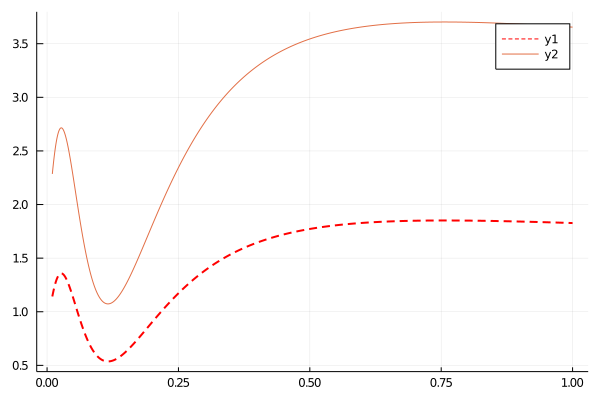

In [172]:
Plots.plot(ϕ, y, color="red", linewidth=2.0, linestyle=:dash)
p=Plots.plot!(ϕ,2*y) # Mutating plot by ! I can add a plot to the old one


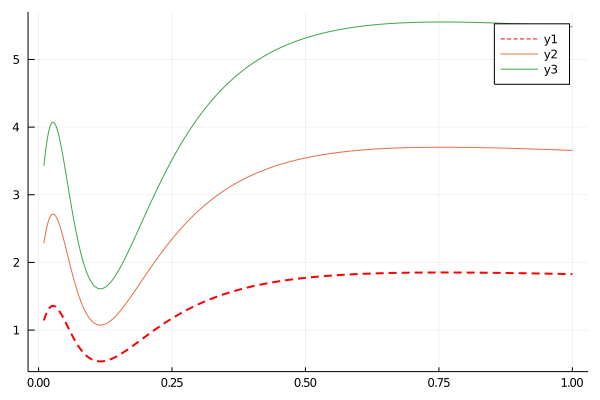

In [173]:
Plots.plot!(p,ϕ,3*y) # Here I keep mutating the old plot by adding to the variable `p`. 

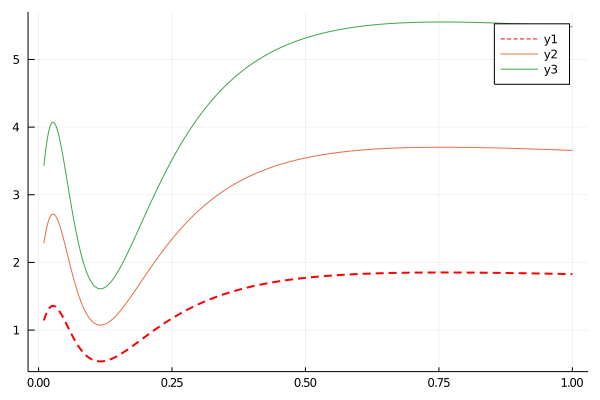

In [174]:
p #Beware this additions is  inplace

# Prototyping

In [37]:
?rand()

```
rand([rng=GLOBAL_RNG], [S], [dims...])
```

Pick a random element or array of random elements from the set of values specified by `S`; `S` can be

  * an indexable collection (for example `1:9` or `('x', "y", :z)`),
  * an `AbstractDict` or `AbstractSet` object,
  * a string (considered as a collection of characters), or
  * a type: the set of values to pick from is then equivalent to `typemin(S):typemax(S)` for integers (this is not applicable to [`BigInt`](@ref)), to $[0, 1)$ for floating point numbers and to $[0, 1)+i[0, 1)$ for complex floating point numbers;

`S` defaults to [`Float64`](@ref). When only one argument is passed besides the optional `rng` and is a `Tuple`, it is interpreted as a collection of values (`S`) and not as `dims`.

!!! compat "Julia 1.1"
    Support for `S` as a tuple requires at least Julia 1.1.


# Examples

```julia-repl
julia> rand(Int, 2)
2-element Array{Int64,1}:
 1339893410598768192
 1575814717733606317

julia> using Random

julia> rand(MersenneTwister(0), Dict(1=>2, 3=>4))
1=>2

julia> rand((2, 3))
3

julia> rand(Float64, (2, 3))
2×3 Array{Float64,2}:
 0.999717  0.0143835  0.540787
 0.696556  0.783855   0.938235
```

!!! note
    The complexity of `rand(rng, s::Union{AbstractDict,AbstractSet})` is linear in the length of `s`, unless an optimized method with constant complexity is available, which is the case for `Dict`, `Set` and `BitSet`. For more than a few calls, use `rand(rng, collect(s))` instead, or either `rand(rng, Dict(s))` or `rand(rng, Set(s))` as appropriate.


---

```
rand([rng::AbstractRNG,] s::Sampleable)
```

Generate one sample for `s`.

```
rand([rng::AbstractRNG,] s::Sampleable, n::Int)
```

Generate `n` samples from `s`. The form of the returned object depends on the variate form of `s`:

  * When `s` is univariate, it returns a vector of length `n`.
  * When `s` is multivariate, it returns a matrix with `n` columns.
  * When `s` is matrix-variate, it returns an array, where each element is a sample matrix.

    rand([rng::AbstractRNG,] s::Sampleable, dim1::Int, dim2::Int...)   rand([rng::AbstractRNG,] s::Sampleable, dims::Dims)

Generate an array of samples from `s` whose shape is determined by the given dimensions.

---

```
rand(rng::AbstractRNG, d::UnivariateDistribution)
```

Generate a scalar sample from `d`. The general fallback is `quantile(d, rand())`.

---

```
rand(rng, d)
```

Extract a sample from the p-Generalized Gaussian distribution 'd'. The sampling procedure is implemented from from [1]. [1]  Gonzalez-Farias, G., Molina, J. A. D., & Rodríguez-Dagnino, R. M. (2009). Efficiency of the approximated shape parameter estimator in the generalized Gaussian distribution. IEEE Transactions on Vehicular Technology, 58(8), 4214-4223.

---

```
rand(::AbstractRNG, ::Distributions.AbstractMvNormal)
```

Sample a random vector from the provided multi-variate normal distribution.

---

```
rand(::AbstractRNG, ::Sampleable)
```

Samples from the sampler and returns the result.

---

```
rand(d::Union{UnivariateMixture, MultivariateMixture})
```

Draw a sample from the mixture model `d`.

```
rand(d::Union{UnivariateMixture, MultivariateMixture}, n)
```

Draw `n` samples from `d`.


In [77]:
?values

search: values ValueSupport myvalues GeneralizedExtremeValue



```
values(iterator)
```

For an iterator or collection that has keys and values, return an iterator over the values. This function simply returns its argument by default, since the elements of a general iterator are normally considered its "values".

# Examples

```jldoctest
julia> d = Dict("a"=>1, "b"=>2);

julia> values(d)
Base.ValueIterator for a Dict{String,Int64} with 2 entries. Values:
  2
  1

julia> values([2])
1-element Array{Int64,1}:
 2
```

---

```
values(a::AbstractDict)
```

Return an iterator over all values in a collection. `collect(values(a))` returns an array of values. When the values are stored internally in a hash table, as is the case for `Dict`, the order in which they are returned may vary. But `keys(a)` and `values(a)` both iterate `a` and return the elements in the same order.

# Examples

```jldoctest
julia> D = Dict('a'=>2, 'b'=>3)
Dict{Char,Int64} with 2 entries:
  'a' => 2
  'b' => 3

julia> collect(values(D))
2-element Array{Int64,1}:
 2
 3
```


In [79]:
random_values=rand( Uniform(0, 1),10000);

In [80]:
typeof(random_values)

Array{Float64,1}

In [81]:
sampled_values=[ f(num) for num in random_values];

In [82]:
eltype(random_values)

Float64

In [83]:
sum(sampled_values)/length(sampled_values)

0.5263537593296514

In [84]:
function mcIntegral(nP)
    _values=rand(Uniform(0, 1),nP);
    _sampled_values=[ f(num) for num in _values];
    sum(_sampled_values)/length(_sampled_values)
end

mcIntegral (generic function with 1 method)

In [193]:
function averageMCintegral(nP)
    trials=100
    range=[ k for k in 1:1:trials ]
    #print(range)
    results=[ mcIntegral(nP) for k in range ]
    [Statistics.mean( results), Statistics.std(results)]
end


averageMCintegral (generic function with 1 method)

In [209]:
averageMCintegral(100)

2-element Array{Float64,1}:
 1.5313337475538273
 0.03901138955973964

In [211]:
points = [10, 100, 1000, 3000, 10000, 30000, 300000, 3000000, 8000000 ] 
integrals = [ [k; averageMCintegral(k)] for k in points ]

9-element Array{Array{Float64,1},1}:
 [10.0, 1.503713942180251, 0.13170825854733395]
 [100.0, 1.5288076028162683, 0.04263729986202773]
 [1000.0, 1.523430091253105, 0.013796726755084754]
 [3000.0, 1.5266590414096175, 0.007886524500260901]
 [10000.0, 1.5257019460124317, 0.004082136283849841]
 [30000.0, 1.5252935096883902, 0.002772841597147397]
 [300000.0, 1.5254543455820095, 0.0007943775236320393]
 [3.0e6, 1.525342361168635, 0.0002298229609491186]
 [8.0e6, 1.5253210676137987, 0.0001428064376234196]

In [218]:
σs=[ i[3] for i in integrals ]
I=[ i[2] for i in integrals ]

9-element Array{Float64,1}:
 1.503713942180251
 1.5288076028162683
 1.523430091253105
 1.5266590414096175
 1.5257019460124317
 1.5252935096883902
 1.5254543455820095
 1.525342361168635
 1.5253210676137987

In [223]:
σs[1:end-k]

8-element Array{Float64,1}:
 0.13170825854733395
 0.04263729986202773
 0.013796726755084754
 0.007886524500260901
 0.004082136283849841
 0.002772841597147397
 0.0007943775236320393
 0.0002298229609491186

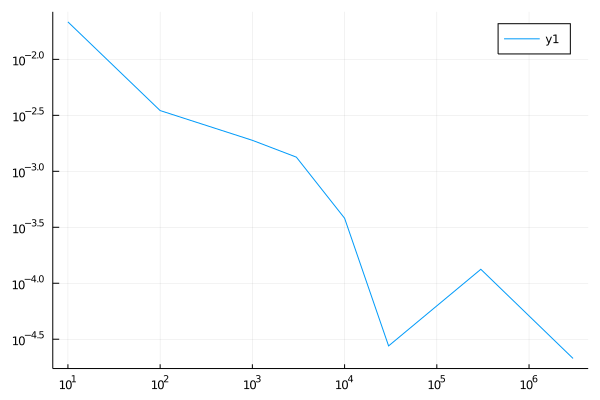

In [229]:
k=1
Plots.plot(points[1:end-k],  abs.(I .- I[end])[1:end-k] , xaxis=:log , yaxis=:log)#, ribbon=(σs[1:end-k]))

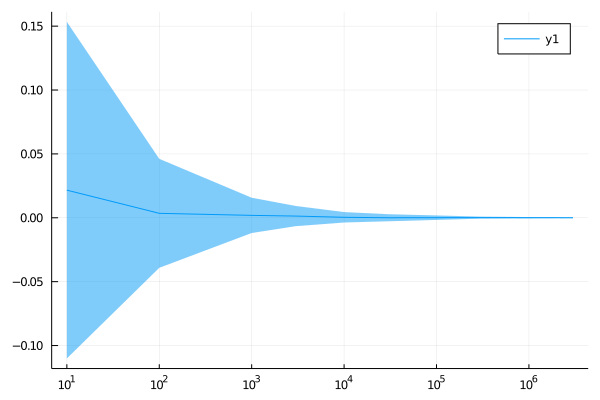

In [231]:
k=1
Plots.plot(points[1:end-k],  abs.(I .- I[end])[1:end-k], ribbon=(σs[1:end-k]), xaxis=:log )